##### (check PYTHONPATH)

In [1]:
pwd

'/Users/nielsbidault/cernbox/EBISSimulation/demo'

In [2]:
cd ..

/Users/nielsbidault/cernbox/EBISSimulation


### Import ebisim and all packages needed:

In [3]:
# Import what we need
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import ebisim

In [4]:
ELEMENT = "K"
species = ebisim.EBISSpecies(ELEMENT)

# Poisson equation solver:

### Initialize Poisson equation solver

In [12]:
print(species)
pb = ebisim.PoissonSolver(ELEMENT, 0.2, 4000, nb_p=10000)

EBISSpecies - Element: Potassium (K, Z = 19)
r_e / r_d = 0.051


### Debugging energy density array
!Problem when y flip sign! i.e when the electron beam starts to be fully compensated

In [19]:
        NkT = np.zeros(2 * (species.element.z + 1))
        NkT[4] = 3e16
        NkT[species.element.z + 5] = 40

### Models of charge-density distributions for ionic and electronic species
Ion models: boltzmann, maxwell3, maxwell5, gaussian, null
Electron models: gaussian, normal (caracteristic size: Herrmann radius)

In [20]:
model = ['boltzmann', 'gaussian']
_ = pb.solve(NkT, model)

Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.0192261194496, -0.0019226119449599999]


In [21]:
print(pb._element)

ChemicalElement(z=19, symbol='K', name='Potassium', a=39)


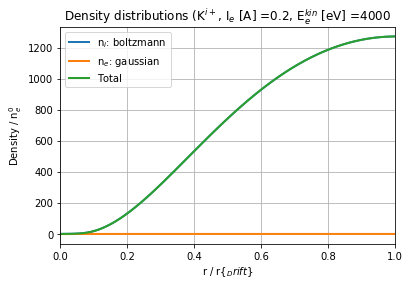

In [22]:
_ = pb.plot_densities()
plt.show()

### Normalized charge-state ionic density distributions

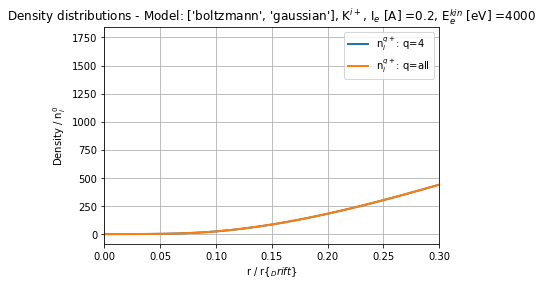

In [23]:
_ = pb.plot_densities_all()
plt.show()

### Potential in the drift area
U_tube = 800 V.
Potential if only electron beam. 
Potential (total) with ion and electron beam.
Difference of latter two potentials (ion beam contribution).

Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.0192261194496, -0.0019226119449599999]


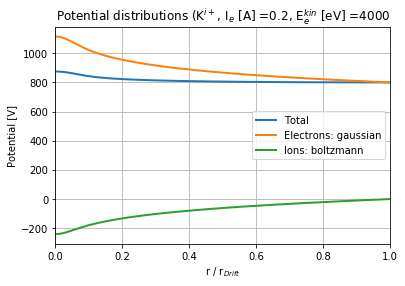

In [24]:
_ = pb.plot_potential()

plt.show()

### Combine all distribution models

Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.

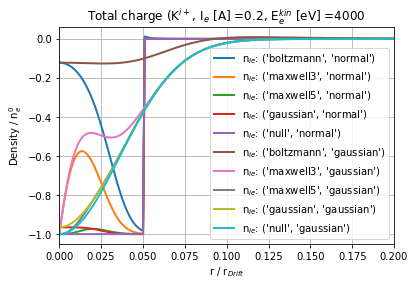

In [12]:
_ = pb.plot_densities_combine(NkT)
plt.show()

Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.026556444372510854, 0]
Ion charge r = 0, boltzmann, Mi and gaussian:
[0.023327691598848, -0.0046655383197696]
Electron charge r = 0, normal and gaussian:
[-0.026556444372510854, 0]
[-0.

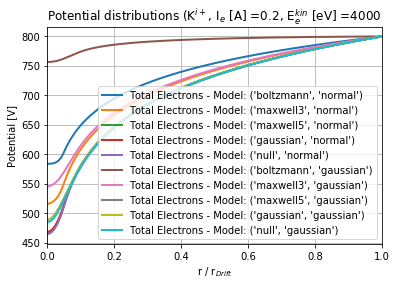

In [13]:
_ = pb.plot_potential_combine(NkT)
plt.show()